<a href="https://colab.research.google.com/github/hihunjin/Code-snippet-for-everything/blob/main/img_heatmap_overlay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!wget -c https://raw.githubusercontent.com/utkuozbulak/pytorch-cnn-visualizations/master/input_images/cat_dog.png -O image.png
!wget -c https://raw.githubusercontent.com/utkuozbulak/pytorch-cnn-visualizations/master/results/gradient_visualizations/cat_dog_Cam_Grayscale.jpg -O cam.png

In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


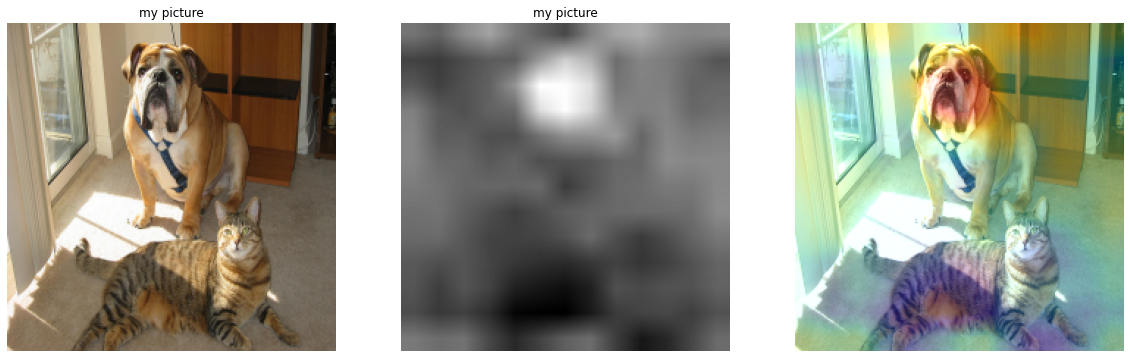

In [3]:
#@title { display-mode: "form", run: "auto" }

'''
jupyter notebook or colab is desired
'''
#@markdown Transparency
transparency = 0.3 #@param {type:"slider", min: 0, max:1, step:0.05}

##### read image and mask
image = cv2.imread('image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread('cam.png', 0)
image = np.float64(image)/256.
mask = mask/256.                            ####### WARNING! mask = (mask-max.min())/(mask.max()-mask.min())

### size
fig = plt.figure(figsize=(20,20))

### image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('my picture')
plt.axis('off')

### mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('my picture')
plt.axis('off')

### colorize
cmap = cm.get_cmap('jet')
mask_rgb = cmap(mask)           ###### mask_rgb.shape = (:,:,4) : RGBA channel  #####

### combine
added_image = cv2.addWeighted(image[:,:,:3],1.,mask_rgb[:,:,:3],transparency,0)

### overlay
plt.subplot(1, 3, 3)
plt.imshow(added_image)
plt.axis('off')
plt.show()
